# 50

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2023-05-29 10:55:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip.3’

NewsAggregatorDatas 100%[===================>]  27.87M  9.68MB/s    in 2.9s    

2023-05-29 10:55:42 (9.68 MB/s) - ‘NewsAggregatorDataset.zip.3’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
replace 2pageSessions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換、'\''はエスケープされたシングルクオーテーション
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

# データの分割,train,testの順に返す。stratifyで均等に分割したい要素を指定(多くは正解データ)
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())


【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


# 51

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
nameoftrain = ""
corpus=[]

for index, tra in df.iterrows():
  corpus.append(tra['TITLE'])
vectorizer = TfidfVectorizer()#tfidfを用いた特徴量

vec = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
nameoftrain = feature_names
feature = pd.DataFrame(vec.toarray(), columns=feature_names)
display(feature)

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,zone,zooey,zoosk,zuckerberg,zynga,zâ,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def feature_value(t):
  corpus=[]

  for index, tra in t.iterrows():
    corpus.append(tra['TITLE'])
  vectorizer = TfidfVectorizer()#tfidfを用いた特徴量

  vec = vectorizer.fit_transform(corpus)
  feature_names = vectorizer.get_feature_names_out()
  feature = pd.DataFrame(vec.toarray(), columns=feature_names)
  for i in nameoftrain:#次元揃えるために全データの単語を扱う
    if not(i in  feature_names):
      feature[i] = 0
  display(feature)
  feature = feature.sort_index(axis=1)#後々のための昇順ソートしておく
  return feature

In [ ]:
feature_value(train)

<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-i

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,wrists,xl,xu,yanking,yorker,yovanna,zack,zebras,zombies,zâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


,00,07,08,09,0ff,0ut,10,100,1000,10000,...,zone,zooey,zoosk,zuckerberg,zynga,zâ,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


# 52

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# モデルの学習
feature=feature_value(train)
lg = LogisticRegression(random_state=123, max_iter=1000)
lg.fit(feature, train['CATEGORY'])

<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-i

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,wrists,xl,xu,yanking,yorker,yovanna,zack,zebras,zombies,zâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


LogisticRegression(max_iter=1000, random_state=123)

# 53

In [ ]:
X_test = feature_value(test)

ストリーミング出力は最後の 5000 行に切り捨てられました。
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

,10,100,1000,100k,106,11,12,13,1300,13th,...,zoe,zombie,zooey,zoosk,zynga,zâ,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pred = lg.predict_proba(X_test) #ラベルの取得方法
print(pred)

[[0.05785885 0.88987399 0.02888336 0.0233838 ]
 [0.07751385 0.82213087 0.02609082 0.07426446]
 [0.97345929 0.00703486 0.00787927 0.01162657]
 ...
 [0.07007341 0.88717742 0.01701898 0.02573018]
 [0.08351384 0.81337402 0.05387751 0.04923462]
 [0.17452529 0.03118888 0.01824807 0.77603777]]


# 54

In [ ]:
X_train = feature_value(train)

<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-i

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,wrists,xl,xu,yanking,yorker,yovanna,zack,zebras,zombies,zâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pred_test=lg.predict(X_test)
pred_train=lg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_test, test['CATEGORY']))
print(accuracy_score(pred_train, train['CATEGORY']))

0.8937125748502994
0.9471171845750656


# 55

In [ ]:
from sklearn.metrics import confusion_matrix
name=["b","e","t","m"]
con_test=confusion_matrix(y_true = test['CATEGORY'], y_pred = pred_test, labels=name)
con_train=confusion_matrix(y_true = train['CATEGORY'], y_pred = pred_train, labels=name)

print(con_test)
print(con_train)

[[532  19  11   1]
 [  8 521   1   0]
 [ 35  25  91   1]
 [ 14  26   1  50]]
[[4416   51   30    4]
 [  21 4212    2    0]
 [ 146  108  965    1]
 [  78  120    4  526]]


# 56

In [ ]:
#適合率:正例と予測したもののうち、どれだけ正解だったか
#再現率:正解が正例のもののうち、どれだけ正例と予測できたか

tekigou_b=0
tekigou_e=0
tekigou_t=0
tekigou_m=0

saigen_b=0
saigen_e=0
saigen_t=0
saigen_m=0

tekigou_b=con_test[0][0]/(con_test[0][0]+con_test[1][0]+con_test[2][0]+con_test[3][0])
tekigou_e=con_test[1][1]/(con_test[0][1]+con_test[1][1]+con_test[2][1]+con_test[3][1])
tekigou_t=con_test[2][2]/(con_test[0][2]+con_test[1][2]+con_test[2][2]+con_test[3][2])
tekigou_m=con_test[3][3]/(con_test[0][3]+con_test[1][3]+con_test[2][3]+con_test[3][3])

print(tekigou_b, tekigou_e, tekigou_t, tekigou_m)

saigen_b=con_test[0][0]/(con_test[0][0]+con_test[0][1]+con_test[0][2]+con_test[0][3])
saigen_e=con_test[1][1]/(con_test[1][0]+con_test[1][1]+con_test[1][2]+con_test[1][3])
saigen_t=con_test[2][2]/(con_test[2][0]+con_test[2][1]+con_test[2][2]+con_test[2][3])
saigen_m=con_test[3][3]/(con_test[3][0]+con_test[3][1]+con_test[3][2]+con_test[3][3])




print(saigen_b, saigen_e, saigen_t, saigen_m)

0.9032258064516129 0.8815566835871405 0.875 0.9615384615384616
0.9449378330373002 0.9830188679245283 0.5986842105263158 0.5494505494505495


In [ ]:
F_b=(2*tekigou_b*saigen_b)/(saigen_b+tekigou_b)
F_e=(2*tekigou_e*saigen_e)/(saigen_e+tekigou_e)
F_t=(2*tekigou_t*saigen_t)/(saigen_t+tekigou_t)
F_m=(2*tekigou_m*saigen_m)/(saigen_m+tekigou_m)

print(F_b, F_e, F_t, F_m)

0.9236111111111112 0.9295272078501339 0.7109375 0.6993006993006995


In [ ]:
macro_tekigou=(tekigou_b+tekigou_e+tekigou_t+tekigou_m)/4
macro_saigen=(saigen_b+saigen_e+saigen_t+saigen_m)/4
macro_F=(F_b+F_e+F_t+F_m)/4
micro_tekigou=(con_test[0][0]+con_test[1][1]+con_test[2][2]+con_test[3][3])/(con_test[0][0]+con_test[1][0]+con_test[2][0]+con_test[3][0])+(con_test[0][1]+con_test[1][1]+con_test[2][1]+con_test[3][1])+(con_test[0][2]+con_test[1][2]+con_test[2][2]+con_test[3][2])+(con_test[0][3]+con_test[1][3]+con_test[2][3]+con_test[3][3])
micro_saigen=(con_test[0][0]+con_test[1][1]+con_test[2][2]+con_test[3][3])/(con_test[0][0]+con_test[0][1]+con_test[0][2]+con_test[0][3])+(con_test[1][0]+con_test[1][1]+con_test[1][2]+con_test[1][3])+(con_test[2][0]+con_test[2][1]+con_test[2][2]+con_test[2][3])+(con_test[3][0]+con_test[3][1]+con_test[3][2]+con_test[3][3])

print(macro_tekigou, macro_saigen, macro_F, micro_tekigou, micro_saigen)

0.9053302378943038 0.7690228652346736 0.8158441295654861 749.0271646859084 775.1207815275311


In [ ]:
#上のように手計算関数しなくても関数用意されている
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(test['CATEGORY'], pred_test, average=None, labels=['b', 'e', 't', 'm']))
print(precision_score(test['CATEGORY'], pred_test,  average='micro'))
print(precision_score(test['CATEGORY'], pred_test,  average='macro'))
print(recall_score(test['CATEGORY'], pred_test, average=None, labels=['b', 'e', 't', 'm']))
print(recall_score(test['CATEGORY'], pred_test,  average='micro'))
print(recall_score(test['CATEGORY'], pred_test,  average='macro'))
print(f1_score(test['CATEGORY'], pred_test, average=None, labels=['b', 'e', 't', 'm']))
print(f1_score(test['CATEGORY'], pred_test,  average='micro'))
print(f1_score(test['CATEGORY'], pred_test,  average='macro'))

[0.90322581 0.88155668 0.875      0.96153846]
0.8937125748502994
0.9053302378943038
[0.94493783 0.98301887 0.59868421 0.54945055]
0.8937125748502994
0.7690228652346736
[0.92361111 0.92952721 0.7109375  0.6993007 ]
0.8937125748502994
0.8158441295654861


# 57

In [ ]:
import numpy as np

features = X_train.columns.values
print(features)
index = [i for i in range(1, 11)]
for c, coef in zip(lg.classes_, lg.coef_):
  print(f'【カテゴリ】{c}')
  best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=['重要度上位'], index=index).T
  worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
  display(pd.concat([best10, worst10], axis=0))
  print('\n')

['00' '07' '08' ... 'œlousyâ' 'œpiece' 'œwaist']
【カテゴリ】b


,1,2,3,4,5,6,7,8,9,10
重要度上位,bank,china,fed,stocks,ecb,euro,oil,ukraine,dollar,profit
重要度下位,the,and,ebola,her,she,video,google,apple,star,kardashian




【カテゴリ】e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,her,chris,she,star,kim,miley,cyrus,paul,he
重要度下位,update,us,google,ceo,facebook,china,study,says,gm,apple




【カテゴリ】m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,study,cancer,drug,fda,mers,could,cases,outbreak,virus
重要度下位,gm,facebook,ceo,apple,google,deal,china,sales,bank,twitter




【カテゴリ】t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,facebook,apple,microsoft,climate,gm,tesla,nasa,comcast,fcc
重要度下位,stocks,her,fed,drug,american,percent,cancer,ecb,ukraine,shares


# 58

In [ ]:
X_valid= feature_value(valid)


ストリーミング出力は最後の 5000 行に切り捨てられました。
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-10-a7bb707a71a3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

,00,10,100,1000,100000,101,106,10million,11,117,...,zombie,zombies,zooey,zoosk,zuckerberg,zynga,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from tqdm import tqdm
import numpy as np

result = []
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
  # モデルの学習
  lg = LogisticRegression(random_state=123, max_iter=1000, C=C)
  lg.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  train_pred = lg.predict(X_train)
  valid_pred = lg.predict(X_valid)
  test_pred = lg.predict(X_test)

  # 正解率の算出
  train_accuracy = accuracy_score(train['CATEGORY'], train_pred)
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
  test_accuracy = accuracy_score(test['CATEGORY'], test_pred)

  # 結果の格納
  result.append([C, train_accuracy, valid_accuracy, test_accuracy])

100%|██████████| 10/10 [24:15<00:00, 145.55s/it]


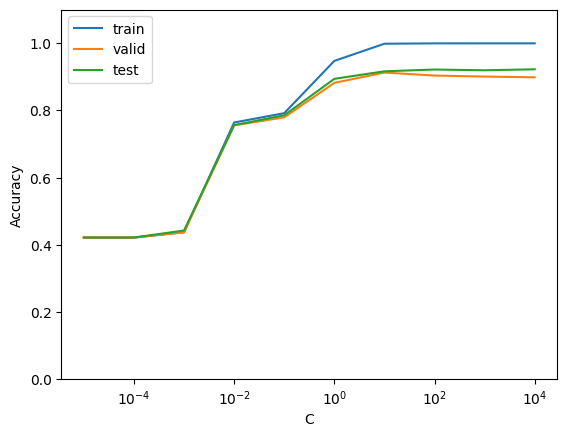

In [ ]:
# 視覚化
from matplotlib import pyplot as plt
result = np.array(result).T#便利、転置とる
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale ('log')
plt.xlabel('C')
plt.legend()
plt.show()

# 59

In [ ]:
max_c=100000000
max_true=-1
for c in tqdm(np.logspace(-5, 3, 10, base=10)):#Cの値を最適化する。ただし時間の都合上10^-5, 10^-2,...10^4までのどれかを選択
  # モデルの学習
  lg = LogisticRegression(random_state=123, max_iter=1000, C=c)
  lg.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  valid_pred = lg.predict(X_valid)

  # 正解率の算出
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred)
  if max_true < valid_accuracy:
    max_c=c

lg = LogisticRegression(random_state=123, max_iter=1000, C=max_c)
lg.fit(X_train, train['CATEGORY'])
test_pred=lg.predict(X_test)
test_accuracy = accuracy_score(test['CATEGORY'], test_pred)
print(test_accuracy)

100%|██████████| 10/10 [17:26<00:00, 104.67s/it]


0.9191616766467066


In [ ]:
#ここからはより汎用性を持たせるためにoptunaを用いる
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna

# 最適化対象を関数で指定
def objective_lg(trial):
  # チューニング対象パラメータのセット
  l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
  C = trial.suggest_loguniform('C', 1e-4, 1e4)

  # モデルの学習
  lg = LogisticRegression(random_state=123, 
                          max_iter=10000, 
                          penalty='elasticnet', 
                          solver='saga', 
                          l1_ratio=l1_ratio, 
                          C=C)
  lg.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  valid_pred = lg.predict(X_valid)

  # 正解率の算出
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])    

  return valid_accuracy 

In [ ]:
# 最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective_lg, timeout=360)

# 結果の表示
print('Best trial:')
trial = study.best_trial
print('  Value: {:.3f}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
  print('    {}: {}'.format(key, value))

[I 2023-05-29 12:30:28,563] A new study created in memory with name: no-name-fa8564e7-8b2e-419e-ae17-57b38efed441
<ipython-input-32-073922c189b7>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
<ipython-input-32-073922c189b7>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)


In [ ]:
# パラメータの設定
l1_ratio = trial.params['l1_ratio']
C = trial.params['C']

# モデルの学習
lg = LogisticRegression(random_state=123, 
                        max_iter=1000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio, 
                        C=C)
lg.fit(X_train, train['CATEGORY'])

# 予測値の取得

test_pred = lg.predict(X_test)

# 正解率の算出
test_accuracy = accuracy_score(test['CATEGORY'], test_pred) 

print(f'正解率（評価データ）：{test_accuracy:.3f}')